<h2> Factors affecting adoption of Renewable Energy for Electricity Generation</h2>

This report aims to examine the market, economic, and environmental factors influencing the adoption of alternative energy sources for electricity generation. It also seeks to gain a better understanding of the extent to which these factors impact adoption. In the following sections, I will present my motivation, data and my findings.

<i>A note:</i> While it would have been interesting to analyze all the data I had access to, I chose to narrow down my focus to 10 target countries with the highest $CO_2$ emissions globally as of 2022. I believe that examining the factors influencing renewable energy adoption rates in these countries over the past 30 years, along with identifying patterns and trends, will yield more meaningful insights while keeping the report concise. In this report, I will be treating every single data point to be under the i.i.d. assumption. The reason behind this is the ultimate goal of this report is not to predict the future trajectory of a particular country, but to gain knowledge of how the variables affect each other.

According to Our World in Data, the top 10 countries are ranked below along with their share of global emissions:

|Country| Global share (% of total)|
|--------|---------|
|1. China|31.50%|
|2. United States |13.00%|
|3. India | 8.10%|
|4. Russia |4.81%|
|5. Japan|2.62%|
|6. Indonesia|1.8%|
|7. Iran|1.78%|
|8. Germany|1.75%|
|9. Saudi Arabia|1.66%|
|10. South Korea|1.53%|

<h2>Identify Datasets</h2>

I will be mainly working with 4 data sets:

1. GDP per Capita:
GDP per capita serves as a key economic indicator, reflecting the average economic output per person within a country. This metric is often associated with energy consumption patterns and a nation's capacity to invest in renewable energy infrastructure. Higher GDP per capita typically correlates with increased energy consumption and greater financial resources, enabling investments in sustainable energy projects. 


2. Fossil Fuel Prices:
I will be using the Brent Price Oil Index to proxy fossil fuel prices as it is a widely recognized benchmark for global oil prices (Burlclaff). It is commonly used as a pricing reference for various fossil fuels and is sensitive to the same socio-economic factors that influence other fossil fuel markets. This sensitivity makes it a valuable proxy for assessing fossil fuel prices in economic analyses. 

In this project, utilizing the Brent Crude Oil Index is crucial for understanding the market incentives that drive countries to transition from fossil fuels to renewable energy sources. Rising fossil fuel prices can increase the cost of energy derived from these sources, especially given the dependency on fossil fuels even today. This could potentially prompting countries to seek alternative, cleaner, and more sustainable energy options. This dynamic underscores the importance of monitoring fossil fuel price trends when evaluating the adoption of renewable energy technologies. (Ben-Salha et. al, 2022)

3. Types of energy used for electricity generation broken down by source:

- Renewables for Generation of Electricity:
This dataset serves as the primary dependent variable in this report, measuring the share of electricity generated from renewable sources in each country. It is crucial for assessing the level of dependence and the current trends in adoption of renewable energy sources. This then has a direct impact on carbon emissions and the achievement of sustainability goals which makes it a very essential topic to explore.

- Fossil Fuel Use for Generation of Electricity:
Although not the primary focus of the report, the share of fossil fuels energy used for electricity generation is an important indicator of a country's transition to cleaner energy sources. Analyzing this dataset provided valuable insights into how some countries are shifting away from fossil fuels and increasing their use of renewable energy.

4. CO₂ Emissions

I included CO₂ emissions in my report since they are a crucial environmental motivator that directly influences a country to push toward cleaner energy solutions. CO₂ emissions being one of the primary contributors to climate change, I belive by examining them alongside renewable energy adoption, I can better understand the relationship between a country’s energy generation patterns and its environmental impact. 

### Why Generation of Electricity?
  
Other than the availability of good quality data, which I of course appreciate, electricity generation plays a significant role in carbon emissions, making it a critical sector to examine when studying energy transitions. The way electricity is produced has a direct impact on a country's carbon footprint, which in turn affects progress toward sustainability goals and climate commitments. For example, countries that rely heavily on fossil fuels for electricity generation tend to have higher levels of carbon emissions. Whereas those investing in renewable energy sources can significantly reduce their emissions. This relationship highlights the importance of understanding how shifts in electricity generation affect a nation’s ability to meet its climate objectives and move toward sustainable energy practices (World Bank, 2020). World Bank. (2020). World Development Indicators. World Bank.

### Why cross-referencing?
Cross-referencing the share of electricity generated from renewables with GDP per capita, fossil fuel prices, CO₂ emissions provides a relatively more holistic insight into the economic, market and environmental factors driving energy transitions across the world. By analyzing these relationships in the top 10 highest carbon emitting countries I am hoping to uncover some hidden patterns and relationships so I can better understand the dynamics driving energy transitions in different countries. 

<h1>Visualize data and compute descriptive statistics</h1>

In [259]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

<h3>The Independent Variables: GDP per capita, Fossil Fuel Price Index & $CO_2$ Emissions</h3>

<h4>1. GDP per capita (1990 - 2022)</h4>

To effectively visualize GDP per capita for the target countries (listed below), I have created line plots for each country, providing a clear overview of their economic performance over time individually and in relation to others.

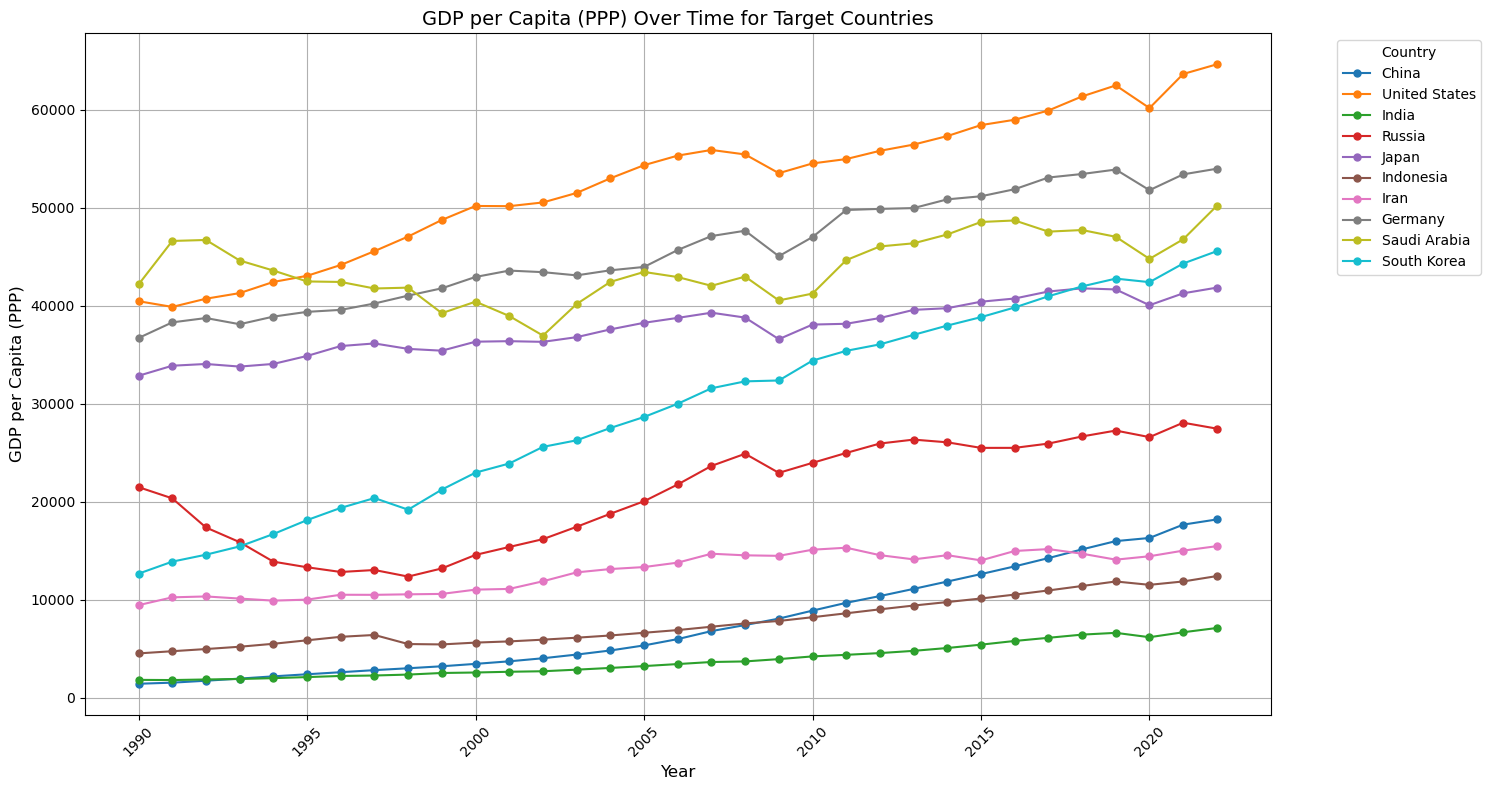

In [263]:
gdp_pc = pd.read_csv("gdp-per-capita-worldbank.csv")
target_countries = ['China', 'United States', 'India', 'Russia', 'Japan', 'Indonesia', 'Iran', 'Germany', 'Saudi Arabia', 'South Korea']

#'Canada', 'Mexico', 'Turkey', 'Brazil', 'South Africa', 'Australia', 'United Kingdom', 'Vietnam', 'Italy', 'Poland', 'France', 'Thailand', 'Malaysia', 'Taiwan', 'Egypt', 'Spain', 'Kazakhstan', 'United Arab Emirates', 'Pakistan', 'Iraq', 'Argentina', 'Algeria', 'Philippines', 'Netherlands', 'Ukraine', 'Uzbekistan'

# filter data set based on the target countries
gdp_pc = gdp_pc[gdp_pc['Entity'].isin(target_countries)]
gdp_pc = gdp_pc.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita'})

# plot data for each target country
plt.figure(figsize=(15, 8)) 
for country in target_countries:
    country_data = gdp_pc[gdp_pc['Entity'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita'], 
             label=country, marker='o', linestyle='-', markersize=5, linewidth=1.5)

# adding title, labels and legend
plt.title('GDP per Capita (PPP) Over Time for Target Countries', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (PPP)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# display plot
plt.tight_layout()
plt.show()

#### Descriptive Statistics: GDP per Capita for Each Target Country

In [12]:
descriptive_gdp_pc = gdp_pc.groupby('Entity')['GDP per capita'].describe()
descriptive_gdp_pc

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
China,33.0,7643.373070,5363.484407,1423.8964,3004.4272,5979.7817,11851.404,18187.8420
Germany,33.0,45718.021758,5492.183989,36699.4800,41022.6130,45044.4900,50845.527,53969.6250
India,33.0,3815.900745,1689.083873,1800.0109,2359.8926,3432.8193,5071.047,7112.0396
Indonesia,33.0,7753.425785,2447.310772,4519.7227,5744.4940,6899.8510,9759.025,12409.7590
Iran,33.0,12857.622591,2063.560903,9442.2480,10547.8400,13780.7280,14541.850,15461.0790
Japan,33.0,37724.032758,2642.411716,32846.3900,35878.7900,38069.9570,39739.543,41837.9100
Russia,33.0,20891.455242,5356.594177,12358.1520,15870.6050,21757.4650,25926.443,28057.0310
Saudi Arabia,33.0,43906.045667,3221.236053,36946.7500,41837.1680,43437.8670,46700.363,50188.2970
South Korea,33.0,29394.034394,10086.455022,12656.3960,20367.9750,29990.5210,37967.477,45560.1250


#### Descriptive Statistics: GDP per Capita for the the whole data

In [77]:
descriptive_gdp = gdp_pc.describe()
descriptive_gdp

,Year,GDP per capita
count,330.000000,330.000000
mean,2006.000000,26217.684204
std,9.536365,17869.014686
min,1990.000000,1423.896400
25%,1998.000000,10033.710250
50%,2006.000000,24929.966000
75%,2014.000000,41820.329000
max,2022.000000,64623.125000


#### GDP per Capita Distribution

After plotting the distribution, I realized the data had two distinct bell shaped peaks which could be separated from each other right by the median of the data. Therefore, I decided to split the data set into two: 1) High GDP and 2) Low GDP. This would make it easy to perform analysis on the data as we move ahead with the project.

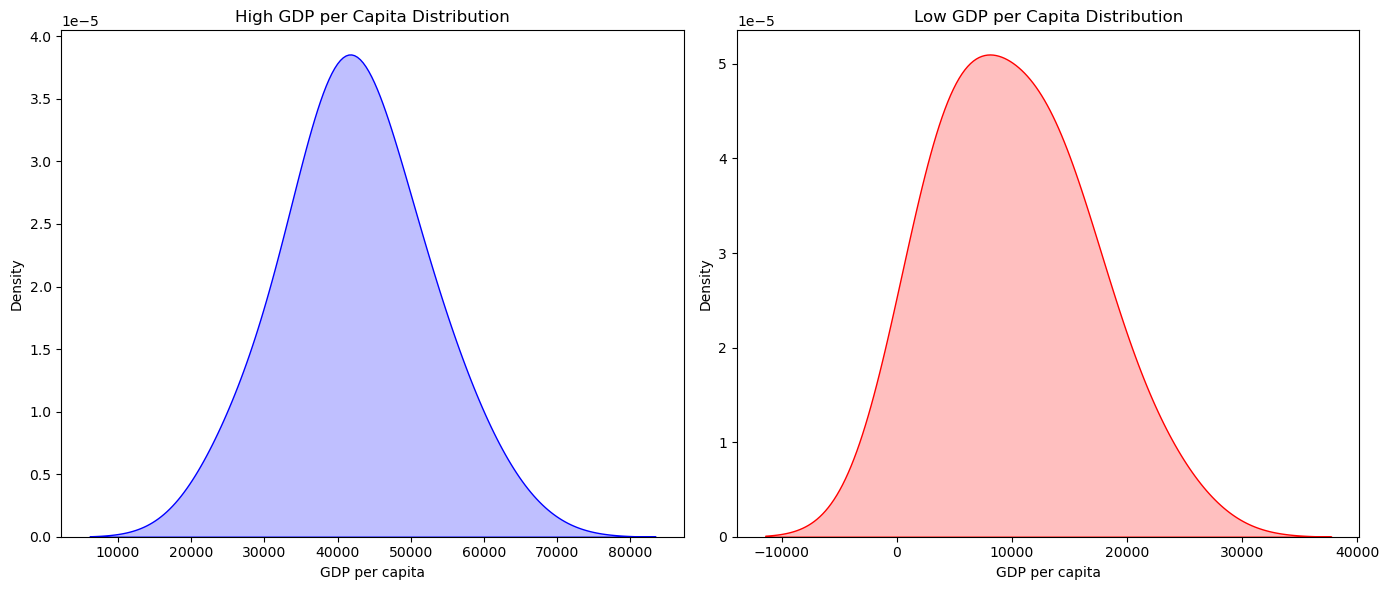

In [133]:
# splitting data around the median
median_gdp = gdp_pc['GDP per capita'].median()

high_gdp = gdp_pc[gdp_pc['GDP per capita'] > median_gdp]
low_gdp = gdp_pc[gdp_pc['GDP per capita'] <= median_gdp]

# plotting the distributions with KDE for high and low GDP per capita.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(high_gdp['GDP per capita'], fill = True, color = 'blue', label = 'High GDP', bw_adjust = 2)
plt.title('High GDP per Capita Distribution')
plt.xlabel('GDP per capita')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(low_gdp['GDP per capita'], fill  = True, color = 'red', label = 'Low GDP', bw_adjust = 2)
plt.title('Low GDP per Capita Distribution')
plt.xlabel('GDP per capita')
plt.ylabel('Density')

# display
plt.tight_layout()
plt.show()

---

<h4>2. Fossil Fuel Price Index (1990 - 2022)</h4>

The price index has been price normalized to the year 2019 for fair comparison. I opted for a simple line plot to visualize the fossil fuel price index, as it just represents a single factor, it is enough to get a sense of its trend over the years.

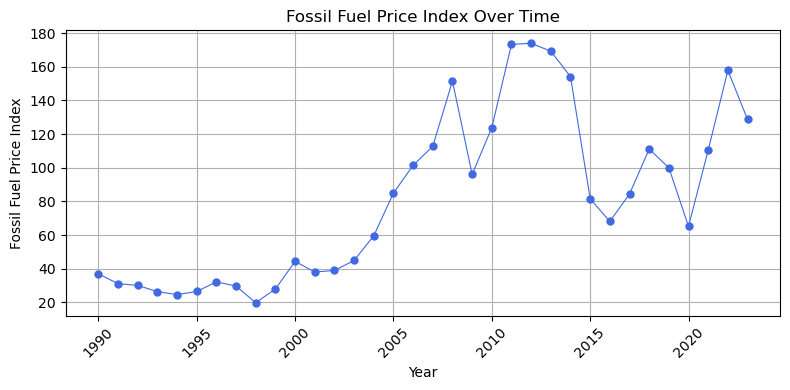

In [267]:
fossil_fuel_price = pd.read_csv("https://ourworldindata.org/grapher/fossil-fuel-price-index.csv?v=1&csvType=filtered&useColumnShortNames=true&country=~Brent", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# formatting the data set for uniformity
fossil_fuel_price = fossil_fuel_price.drop(columns = ['Entity', 'coal_price_index', 'gas_price_index', 'Code'])
fossil_fuel_price = fossil_fuel_price.rename(columns = {'oil_spot_crude_price_index':'Fossil Fuel Price Index'})
fossil_fuel_price = fossil_fuel_price[fossil_fuel_price['Year'] >= 1990]

# plotting the data
plt.figure(figsize=(8, 4))
years = fossil_fuel_price['Year'].unique()
plt.plot(fossil_fuel_price['Year'], fossil_fuel_price['Fossil Fuel Price Index'], 
         marker='o', color='royalblue', markersize = 5, linewidth = 0.8, label='Fossil Fuel Price')

# adding title and labels
plt.title('Fossil Fuel Price Index Over Time')
plt.xlabel('Year')
plt.xticks(ticks = years[::5], rotation=45)
plt.ylabel('Fossil Fuel Price Index')
plt.grid(True)

# display
plt.tight_layout()
plt.show()

<h4>Descriptive Statistics: Fossil Fuel Price Index</h4>

In [270]:
descriptive_fossil_fuel_price = fossil_fuel_price['Fossil Fuel Price Index'].describe()
descriptive_fossil_fuel_price

count     34.000000
mean      81.162739
std       50.419275
min       19.803064
25%       33.378960
50%       74.848212
75%      112.316900
max      173.911710
Name: Fossil Fuel Price Index, dtype: float64

#### Fossil fuel price index distribution

The natural distribution of the data seemed to have three very close peaks which I did not find to serve a significant insight to the data - given the fact that the standard deviation of this particular data is quite high. This volatily in prices is expected since fossil fuel prices are typically sensitive to global economic, political and social unrests. Since the aim of this report is to highlight broaders trends, I have decided to use a higher bandwidth to smooth out this curve to be able to utilize the data aptly.

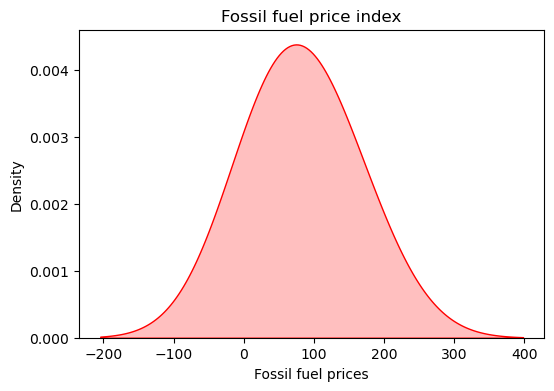

In [273]:
plt.figure(figsize=(6, 4))
sns.kdeplot(fossil_fuel_price['Fossil Fuel Price Index'], fill = True, color='red', bw_adjust = 3)
plt.title('Fossil fuel price index')
plt.xlabel('Fossil fuel prices')
plt.ylabel('Density')
plt.show()

-----

<h4>3. Annual $CO_2$ Emissions by Country (in million tonnes) (1990 - 2022)</h4>

I chose to plot each country's annual CO₂ emissions separately rather than together because of the significant differences between countries like China and the US compared to others. This large variation made the combined plot hard to interpret. Plotting them individually allows for cleaner observation of the overall trends over time.

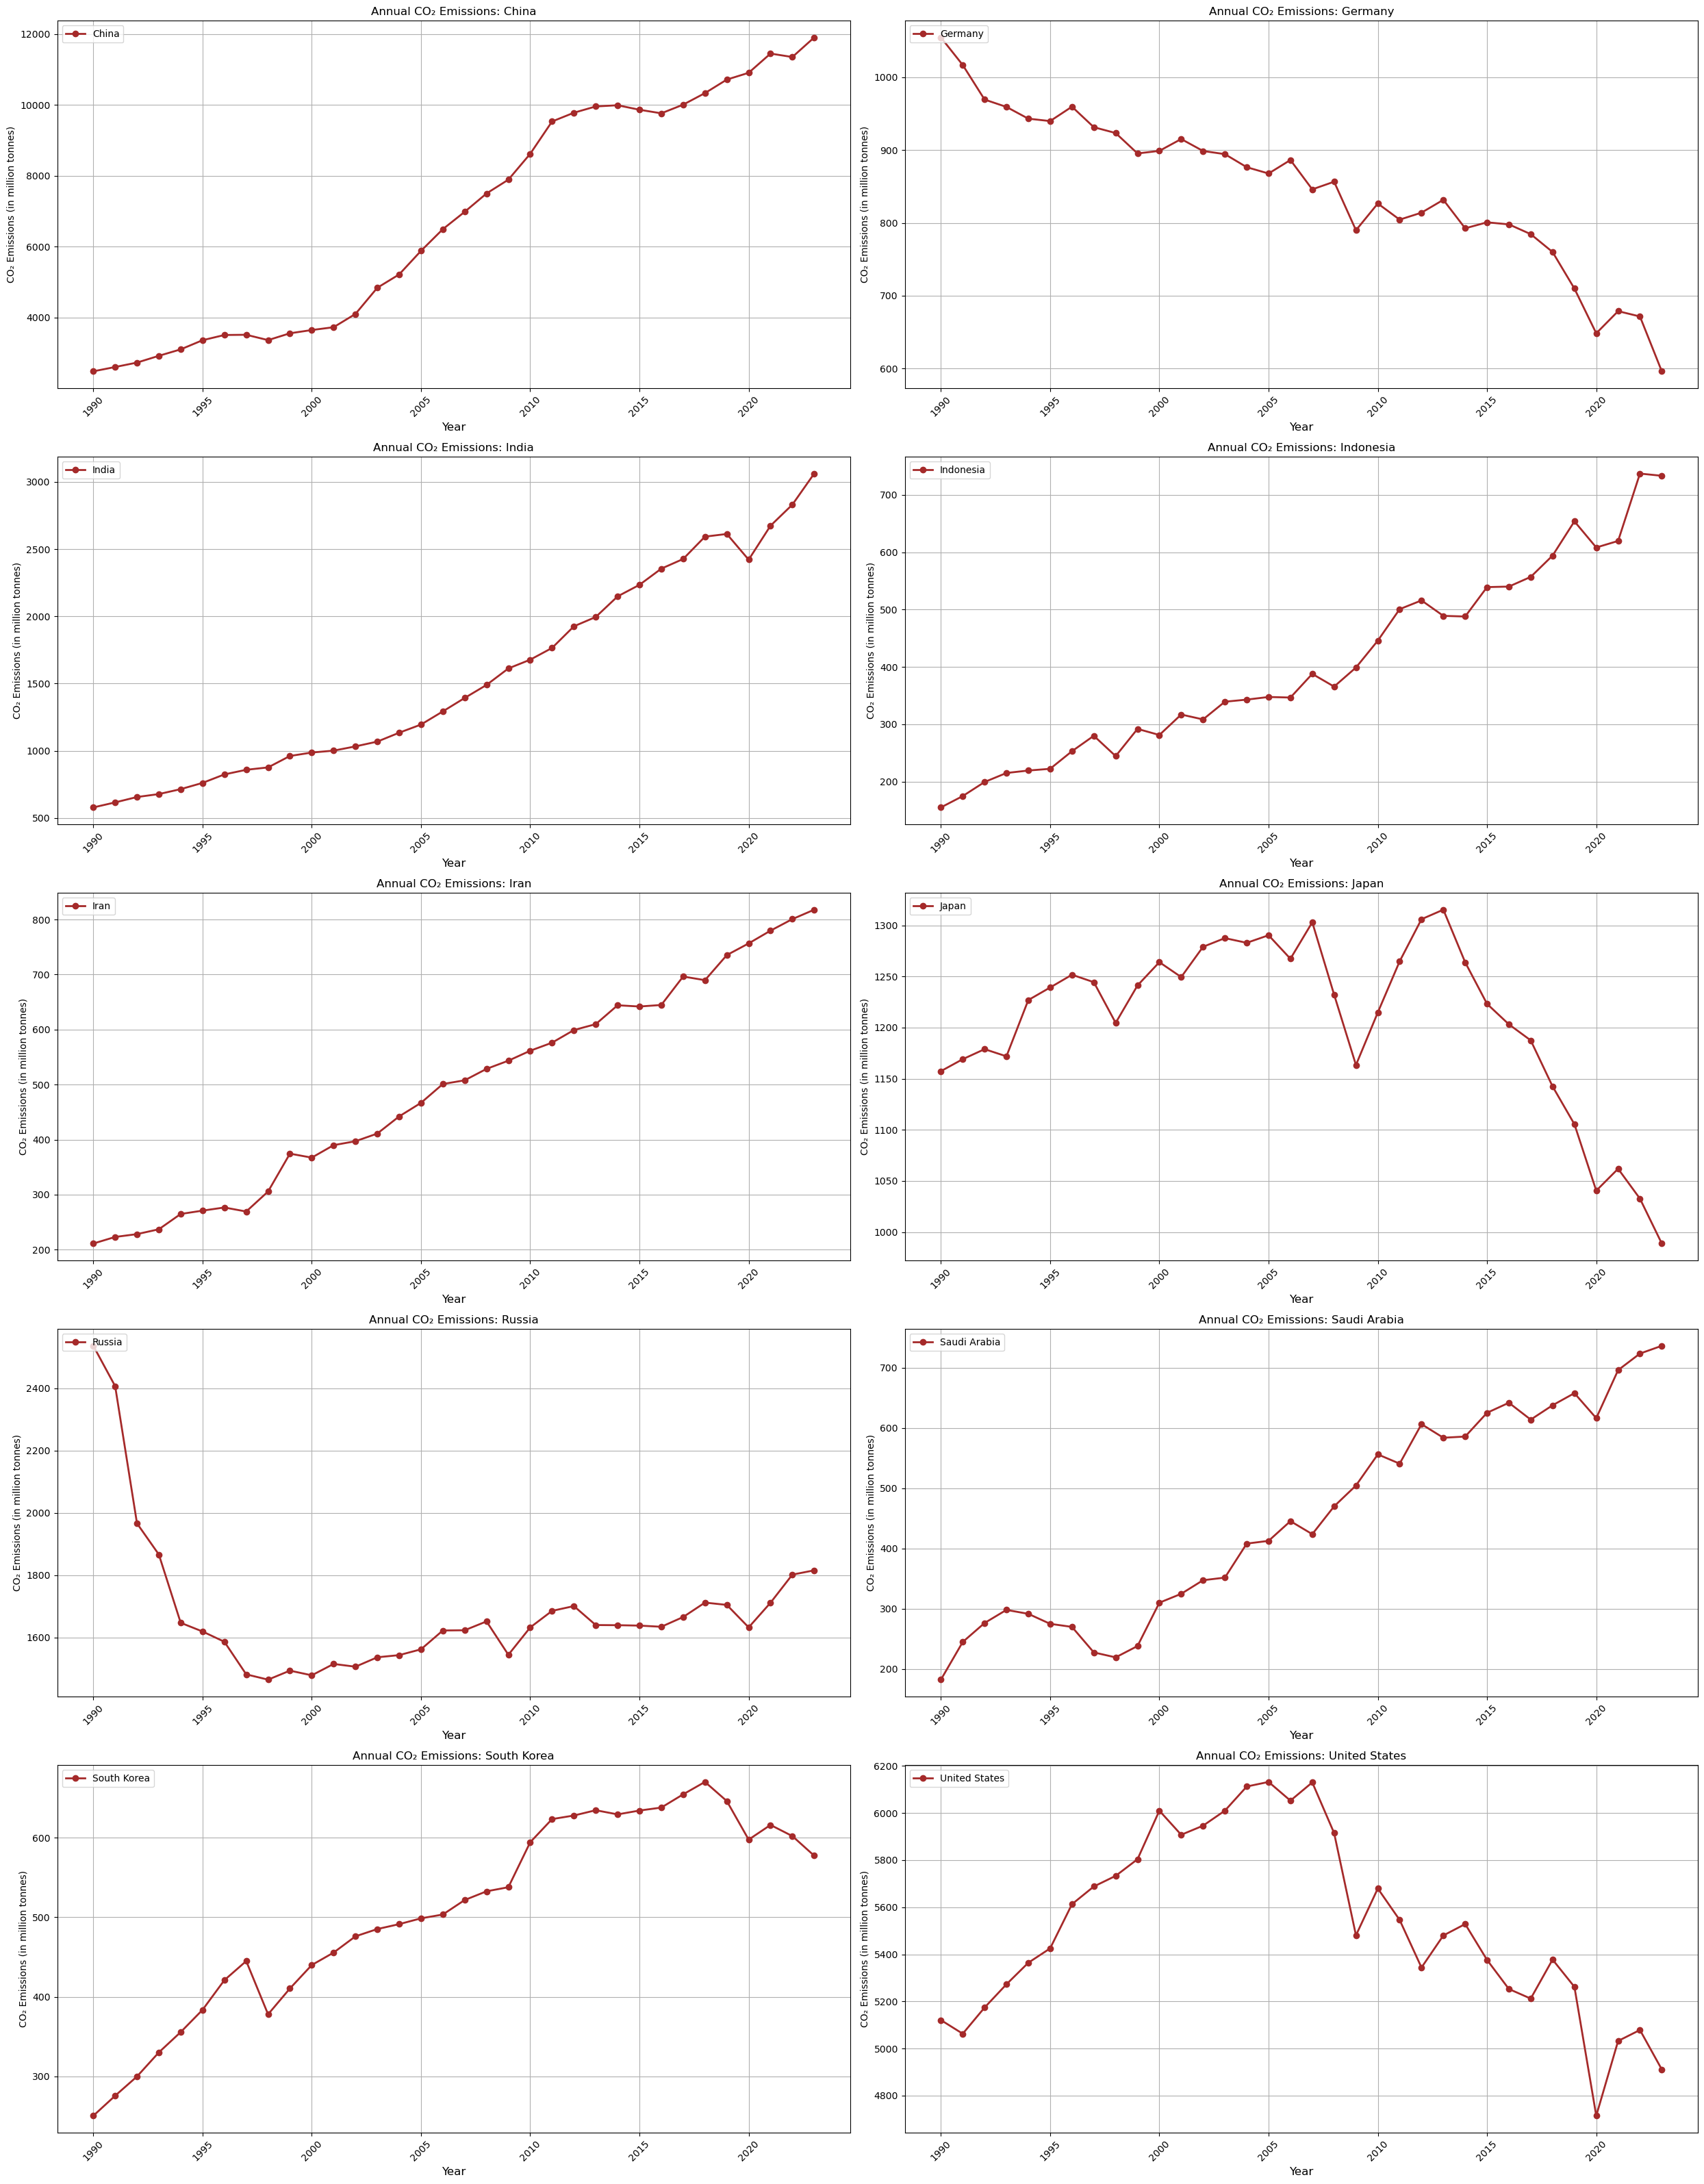

In [279]:
co2_data_full = pd.read_csv("owid-co2-data.csv")

# formatting the data set for uniformity
co2_data = co2_data_full[co2_data_full['year'] >= 1990]
co2_data = co2_data[co2_data['country'].isin(target_countries)]
co2_data = co2_data[['year', 'country', 'co2']]
co2_data.rename(columns={'year': 'Year', 'country': 'Entity', 'co2': 'Annual co2 emissions(in million tonnes)'}, inplace=True)

# setting up the subplots
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(25, 32))
axes = axes.flatten()

# plot data for each country in its own subplot
for i, country in enumerate(co2_data['Entity'].unique()):
    country_data = co2_data[co2_data['Entity'] == country]
    ax = axes[i]
    
    ax.plot(country_data['Year'], country_data['Annual co2 emissions(in million tonnes)'], 
            label = country, marker = 'o', color = 'brown', markersize = 6, linewidth = 2)
    
    # adding title, labels and legend
    ax.set_title(f'Annual CO₂ Emissions: {country}')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('CO₂ Emissions (in million tonnes)')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left', fontsize=10)

# display
plt.tight_layout()
plt.show()

<h4>Descriptive Statistics: Annual $CO_2$ Emissions</h4>

In [281]:
descriptive_co2_data = co2_data.groupby('Entity')['Annual co2 emissions(in million tonnes)'].describe()

descriptive_co2_data

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
China,34.0,6812.111059,3275.706649,2484.855,3526.01425,6738.9390,9933.11100,11902.503
Germany,34.0,848.314412,105.438160,596.151,793.93775,862.2440,921.43800,1054.796
India,34.0,1542.429353,755.593918,577.996,897.01975,1342.4955,2212.75025,3062.324
Indonesia,34.0,403.335882,163.965319,155.081,280.28825,356.6675,533.35025,737.073
Iran,34.0,493.223941,189.141293,211.075,321.03475,504.3965,643.59100,817.880
Japan,34.0,1207.487265,82.897717,988.785,1169.79275,1229.5445,1264.59600,1315.298
Russia,34.0,1684.757029,229.246710,1465.253,1549.41975,1636.7800,1704.09025,2536.248
Saudi Arabia,34.0,451.019206,170.904644,182.025,292.92500,434.3500,611.78925,736.205
South Korea,34.0,507.016853,120.815263,250.511,425.74225,512.5935,621.60100,670.169


#### $CO_2$ Emissions Distribution

As noted while creating the line plot, we can clearly observe the curve for the $CO_2$ emissions is a bit skewed with a long tail on the right side, due to outliers such as China and United States. Nonetheless, the rest of the data still provides us with a normal distribution!

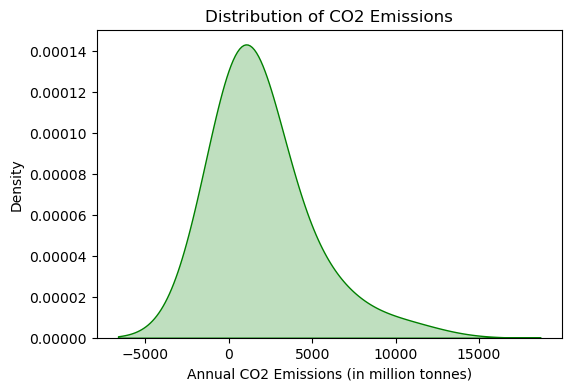

In [285]:
plt.figure(figsize=(6, 4))
sns.kdeplot(co2_data['Annual co2 emissions(in million tonnes)'], fill = True, color='green', bw_adjust = 3)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('Annual CO2 Emissions (in million tonnes)')
plt.ylabel('Density')
plt.show()

---

<h3>The Dependent Variable: Electricity Generation from Renewables Sources</h3>

<h4>Share of electricity generation from renewable sources (1990 - 2023)</h4>
Renewables include electricity production from hydropower, solar, wind, biomass & waste,
geothermal, wave, and tidal sources. Here I created a simple line chart to show overall changes in the share of electricity generation from renewable resources. This may not be the most informative chart but serves good to have an idea!

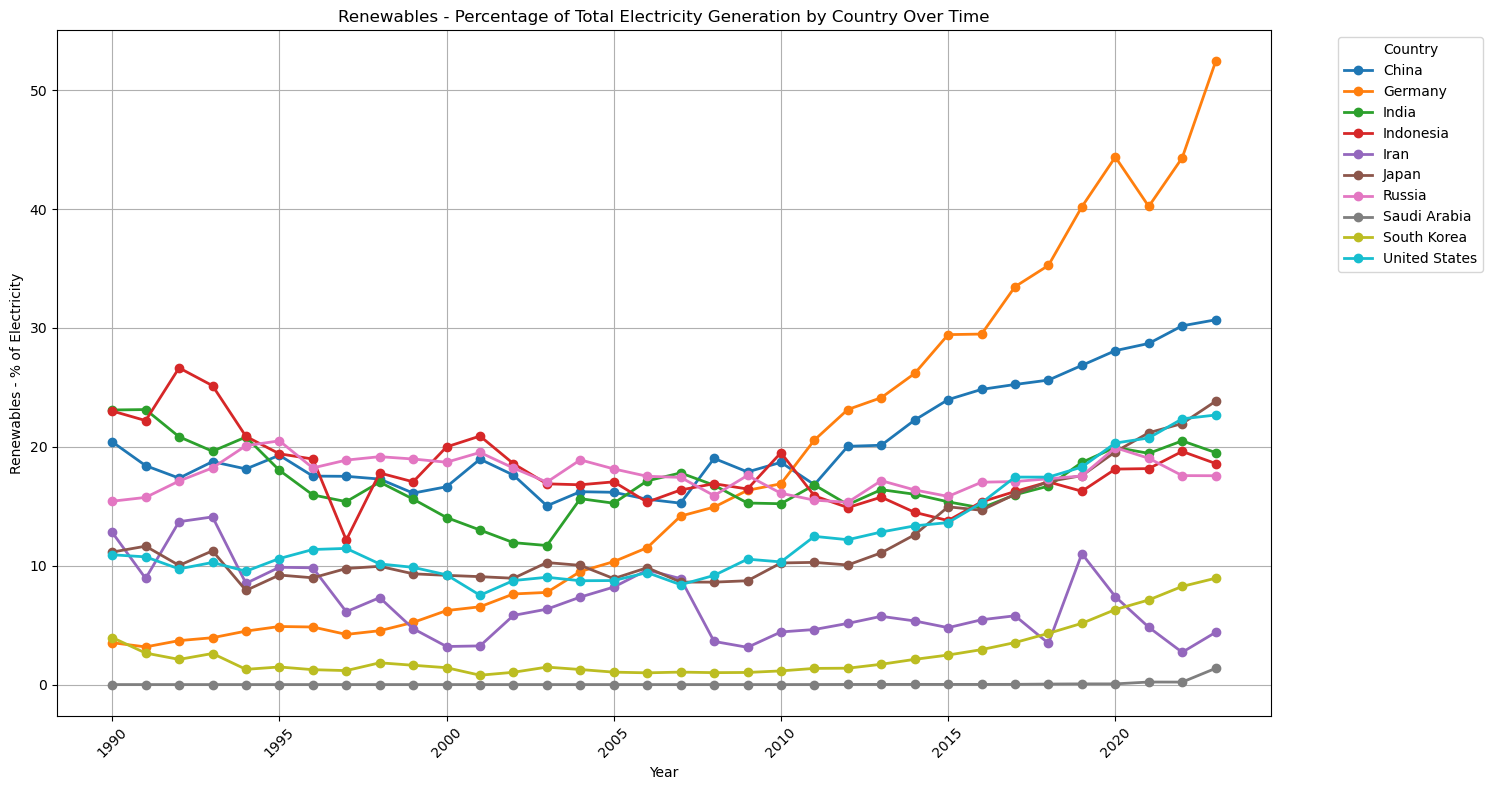

In [288]:
eg_renewables = pd.read_csv("share-of-electricity-production-from-renewables (1).csv").fillna(0)
#eg_renewables.head()

eg_renewables = eg_renewables[eg_renewables['Year'] >= 1990]
eg_renewables = eg_renewables[eg_renewables['Entity'].isin(target_countries)]


plt.figure(figsize=(15, 8)) 

# plot data for each target country
for country in eg_renewables['Entity'].unique():
    country_data = eg_renewables[eg_renewables['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables - % electricity'], 
             label=country, marker='o', markersize=6, linewidth=2)

plt.title('Renewables - Percentage of Total Electricity Generation by Country Over Time')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Renewables - % of Electricity')
plt.grid(True)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1))

# display
plt.tight_layout()
plt.show()

<h4>Descriptive Statistics for electricty generated by renewable source by country</h4>

In [108]:
descriptive_eg_renewables = eg_renewables.groupby('Entity')['Renewables - % electricity'].describe()
descriptive_eg_renewables

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
China,34.0,20.331675,4.558164,15.036272,17.306905,18.721112,23.538625,30.680400
Germany,34.0,17.867684,14.638606,3.167792,4.969683,12.842943,28.618914,52.409912
India,34.0,17.017126,2.793196,11.695108,15.294914,16.543498,19.258490,23.131565
Indonesia,34.0,18.007590,3.078431,12.157131,16.245817,17.052909,19.480355,26.638683
Iran,34.0,6.778816,3.074054,2.714503,4.649072,5.801666,8.811532,14.103046
Japan,34.0,12.131205,4.319378,7.919253,9.193633,10.143011,14.146700,23.830055
Russia,34.0,17.665644,1.403469,15.333826,17.022445,17.557474,18.836175,20.501010
Saudi Arabia,34.0,0.059856,0.236054,0.000000,0.000000,0.000000,0.014190,1.364322
South Korea,34.0,2.582733,2.175065,0.787402,1.194127,1.551732,2.866976,8.945115


#### Descriptive statistics for electricty generated by renewable source across the countries

In [115]:
desc_eg_renewables = eg_renewables.describe()
desc_eg_renewables

,Year,Renewables - % electricity
count,340.000000,340.000000
mean,2006.500000,12.489836
std,9.825168,8.673344
min,1990.000000,0.000000
25%,1998.000000,5.150236
50%,2006.500000,13.175009
75%,2015.000000,17.663372
max,2023.000000,52.409912


#### Distribution of share of electricity generated by renewable sources

In the distribution below we can also notice the right tail extends a lot further than the right one. This means that the data has a few values that report a higher than expected share of electricity generated from renewables over the last 30 years.

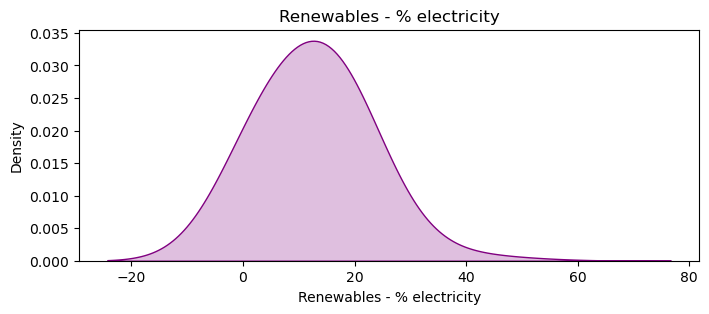

In [139]:
# Plotting the distribution of CO2 emissions
plt.figure(figsize=(8, 3))
sns.kdeplot(eg_renewables['Renewables - % electricity'], fill = True, color = 'purple', bw_adjust= 3)
plt.title('Renewables - % electricity')
plt.xlabel('Renewables - % electricity')
plt.ylabel('Density')
plt.show()


---

<h3> Visualisation for further analysis</h3>

Having visualized all the variables individually, I will now create combined visuals to gain deeper insights into the observable trends and relationships between the data. Particularly;

1. An area chart to help me understand the relative share of different electricity sources over time, allowing to visually track the shifts between fossil fuels, renewables, and nuclear energy in each country. By visualizing these changes, I can observe how different energy sources evolve in response to factors like economic growth and fossil fuel prices.
   
2. I will generate a correlation matrix to quantify the relationships between all the variables. This matrix will allow me to identify strong correlations and patterns, helping me better understand how factors like GDP per capita, energy prices, and CO2 emissions interact with each other before I move on to formulate hypotheses.

In [177]:
# merging datasets for comprehensive plotting
eg_fossil_fuels = pd.read_csv("share-of-electricity-production-from-fossil-fuels.csv").fillna(0)
eg_fossil_fuels = eg_fossil_fuels[eg_fossil_fuels['Year'] >= 1990]


merged_data = (pd.merge(eg_fossil_fuels[['Entity', 'Year', 'Fossil fuels - % electricity']],
             eg_renewables[['Entity', 'Year', 'Renewables - % electricity']], on=['Entity', 'Year'], how='outer')
    .merge(gdp_pc[['Entity', 'Year', 'GDP per capita']], on=['Entity', 'Year'], how='outer')
    .merge(fossil_fuel_price[['Year', 'Fossil Fuel Price Index']], on=['Year'], how='left')
    .merge(co2_data[['Entity', 'Year', 'Annual co2 emissions(in million tonnes)']], on=['Entity', 'Year'], how='outer')
)


<h4> Share of electricity generated by different sources by each country over time</h4>

As can be observed, there seems to be general increase in the share of renewable energy sources in all of the countries (yes, even Saudi Arabia - despite their chart being 99.99% red). One event worth noting is the rapid increase of both fossil fuel and renewable driven EG (electricity generation) after 2010. This was due to the Fukushima nuclear accident following which Japan shut down all nuclear operations and rapidly compensated with fossil fuels and renewable energy. Despite such extremeties, the data overall is quite sound. Since I am using the data under an i.i.d. assumption, such events do not affect the report's perspective.

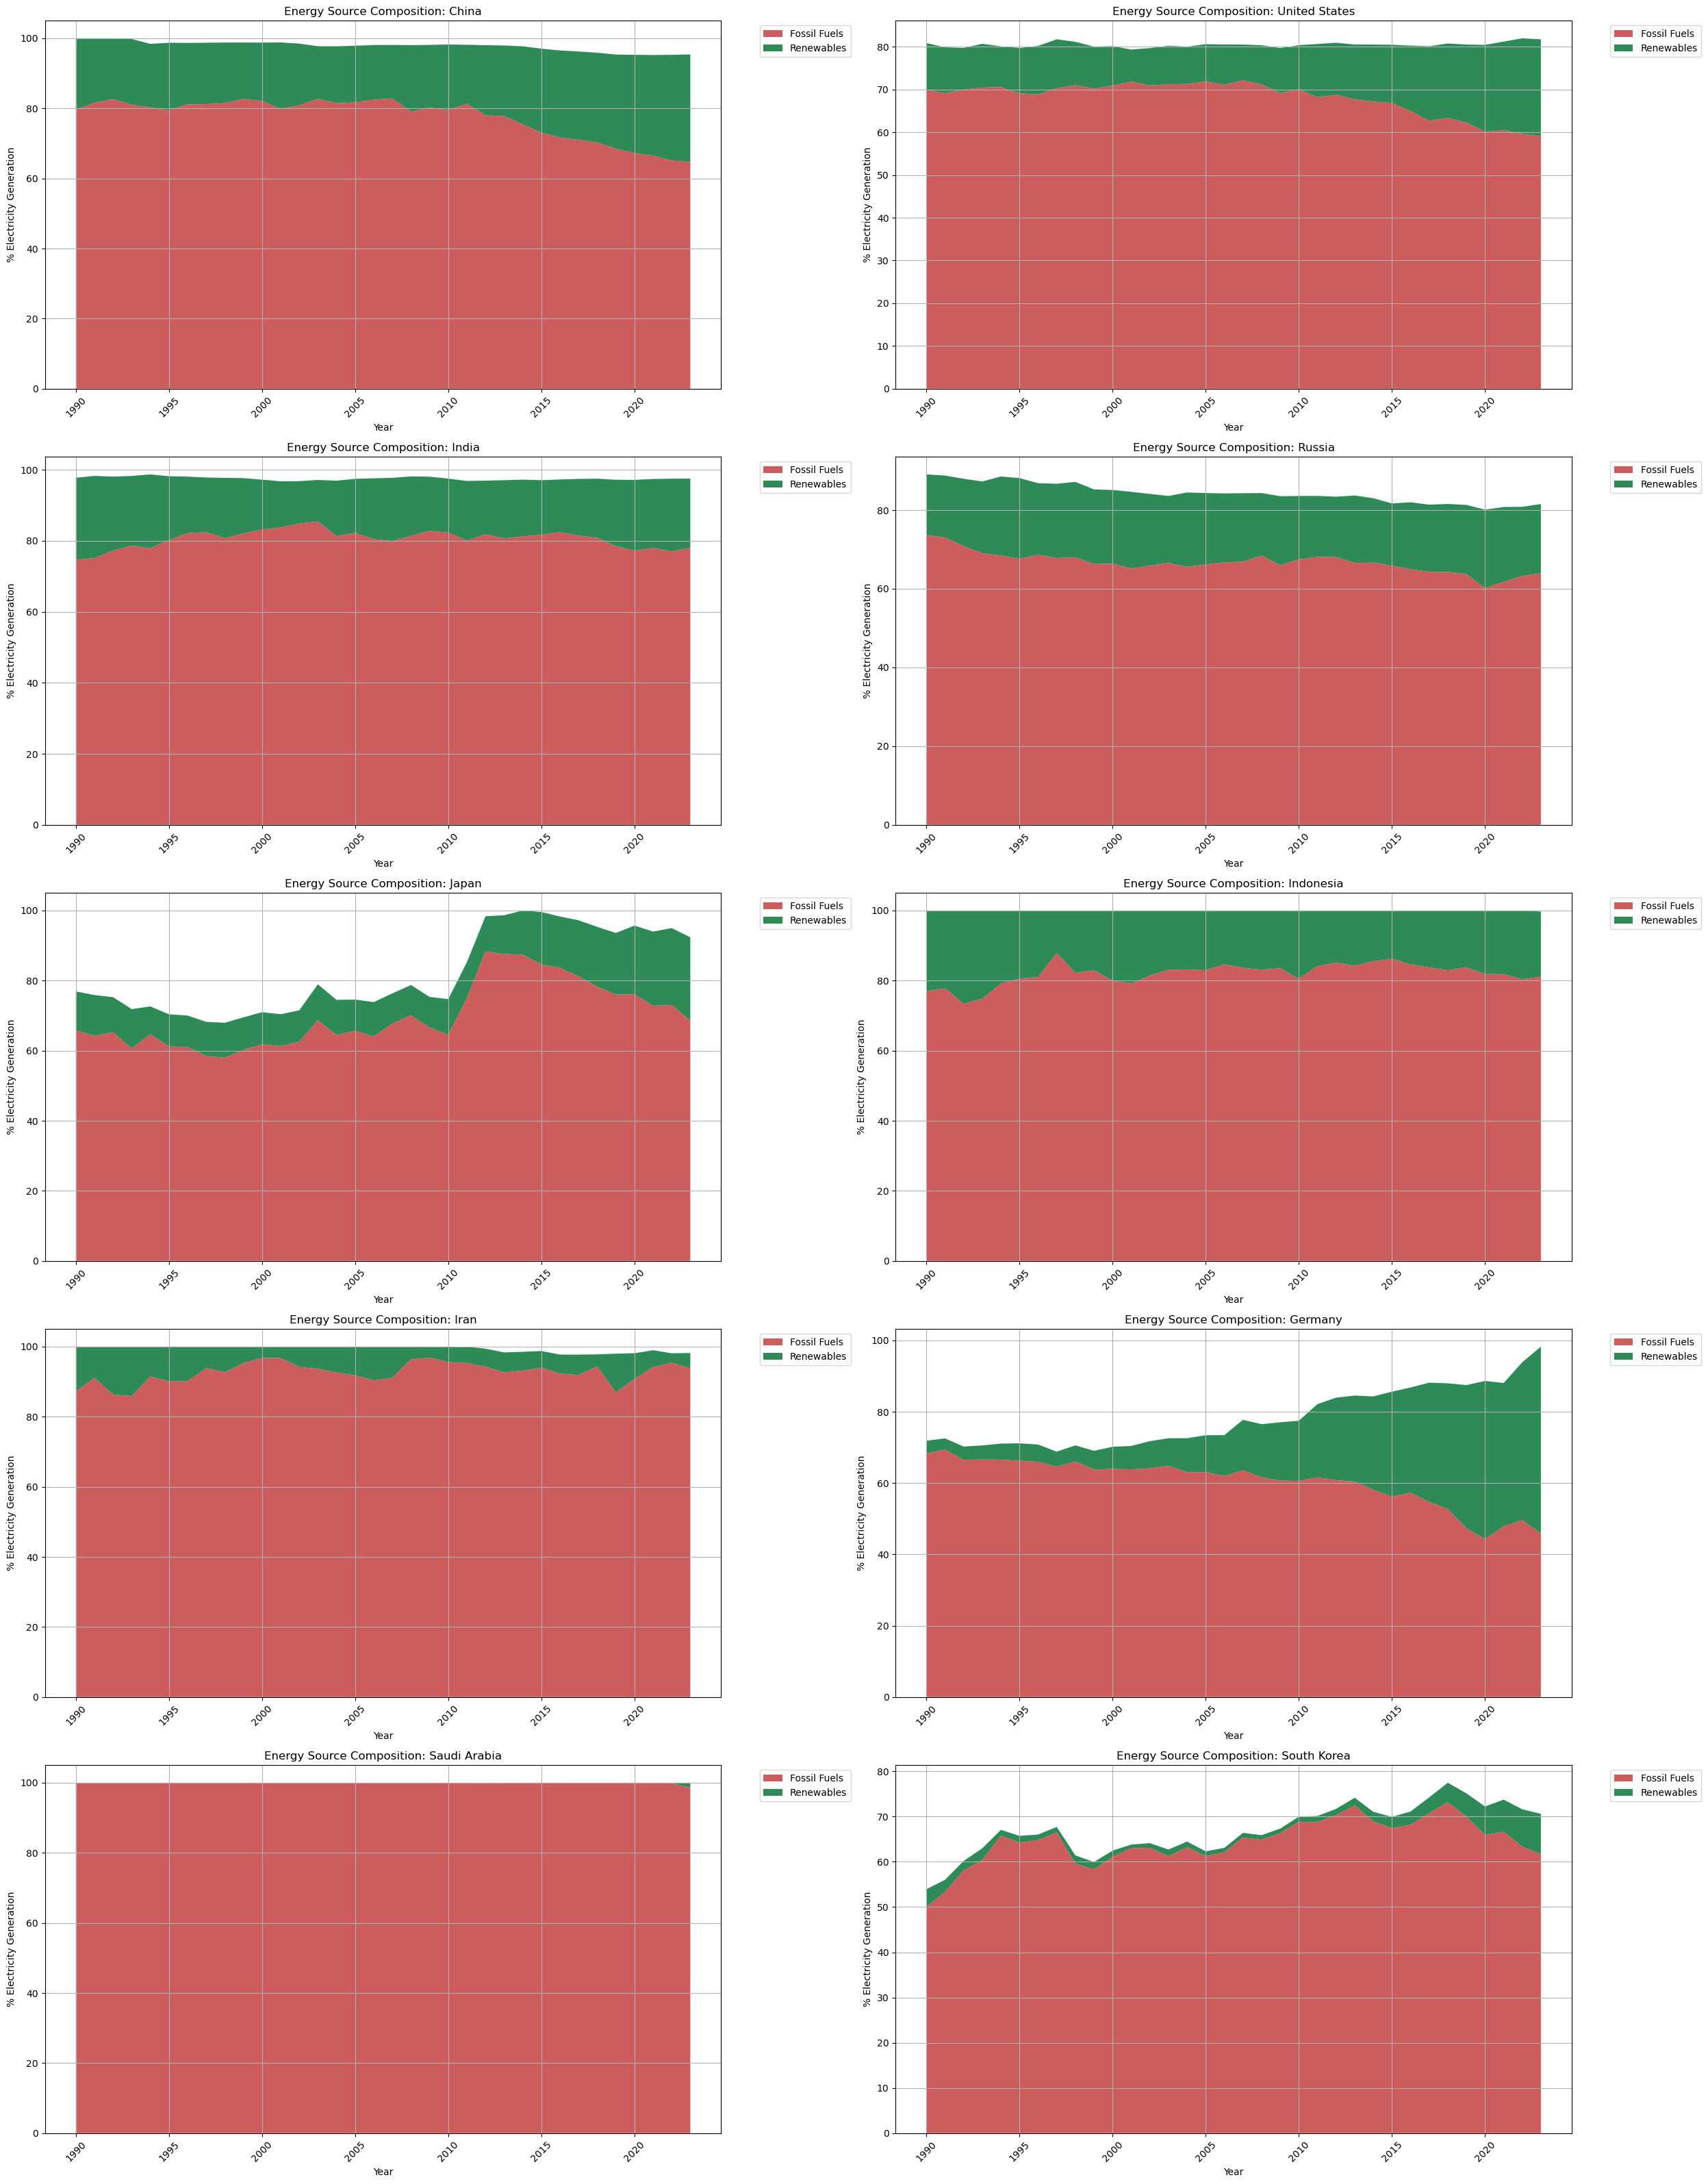

In [180]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(25, 32))
axes = axes.flatten()

# logic for creating stacked area chart
for i, country in enumerate(target_countries):
    country_data = merged_data[merged_data['Entity'] == country]
    
    # creating subplots
    ax = axes[i]
    ax.stackplot(country_data['Year'], country_data['Fossil fuels - % electricity'], country_data['Renewables - % electricity'],
                 labels = ['Fossil Fuels', 'Renewables'], colors = ['indianred', 'seagreen'])

    # add labels, title and legend  
    ax.set_title(f'Energy Source Composition: {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('% Electricity Generation')
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# display
plt.show()

<h4> Correlation Heatmap by Country</h4>

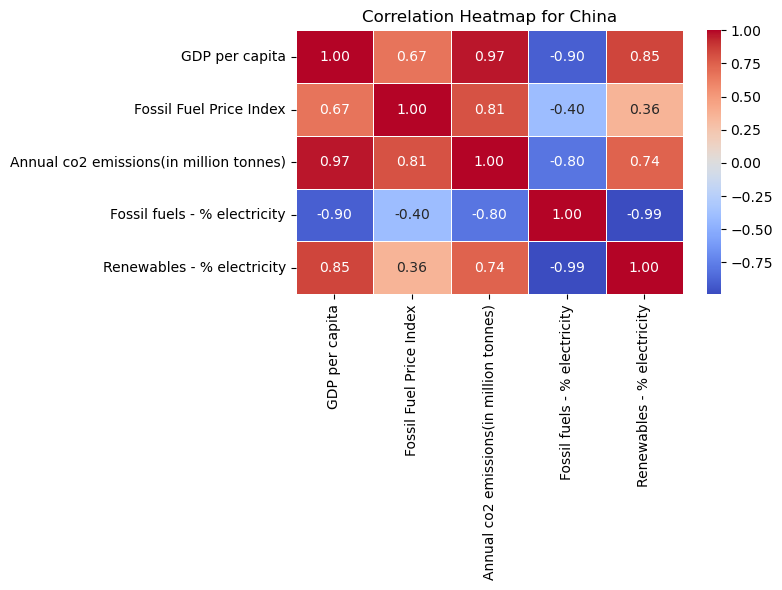

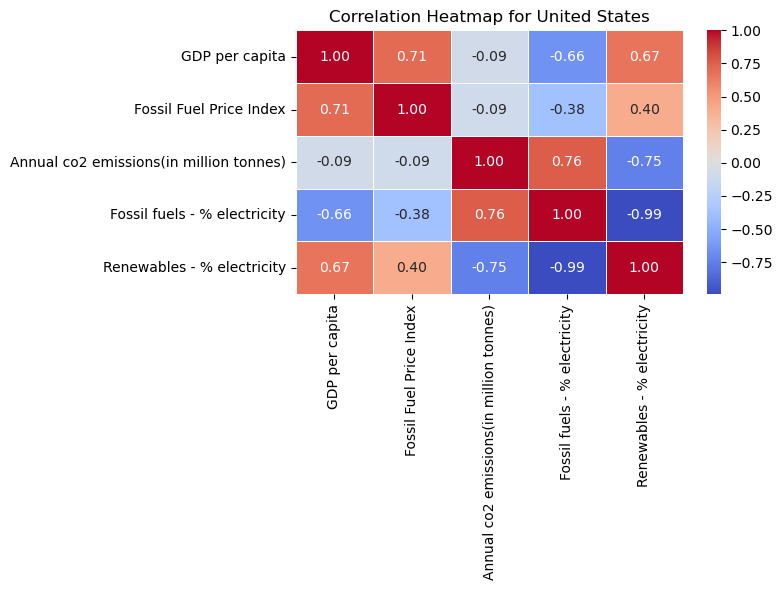

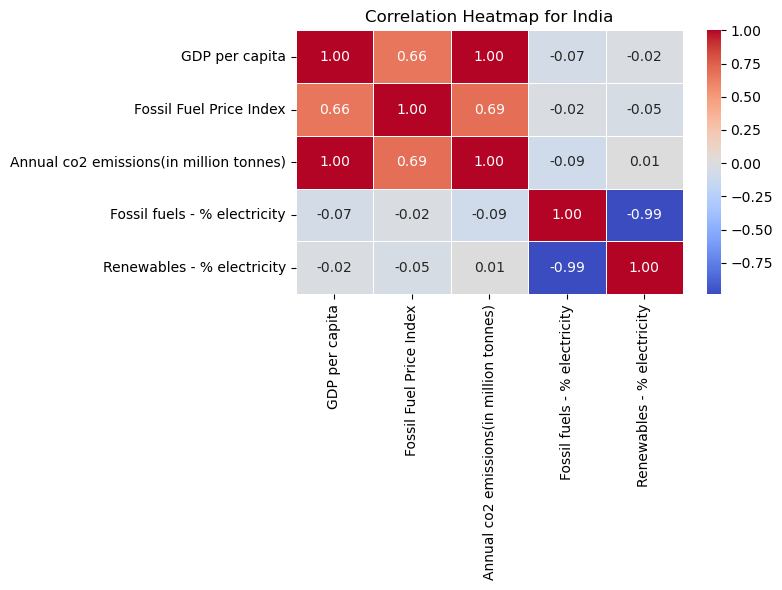

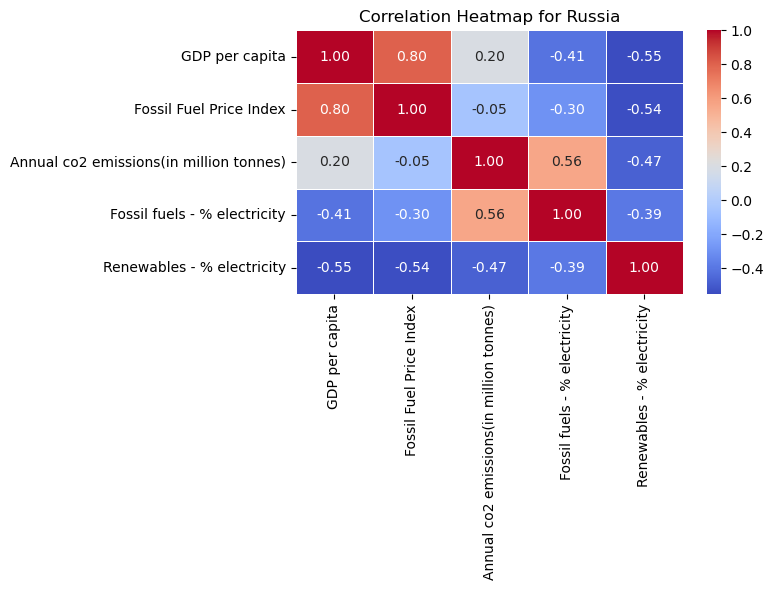

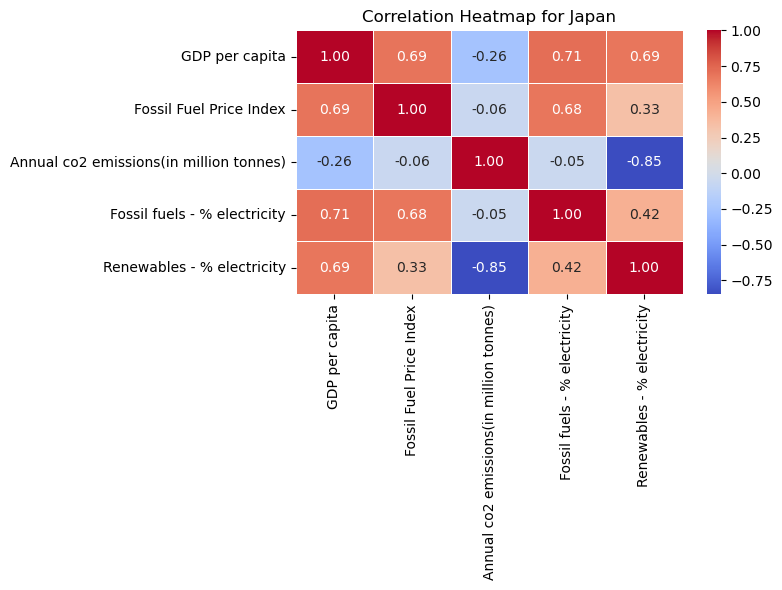

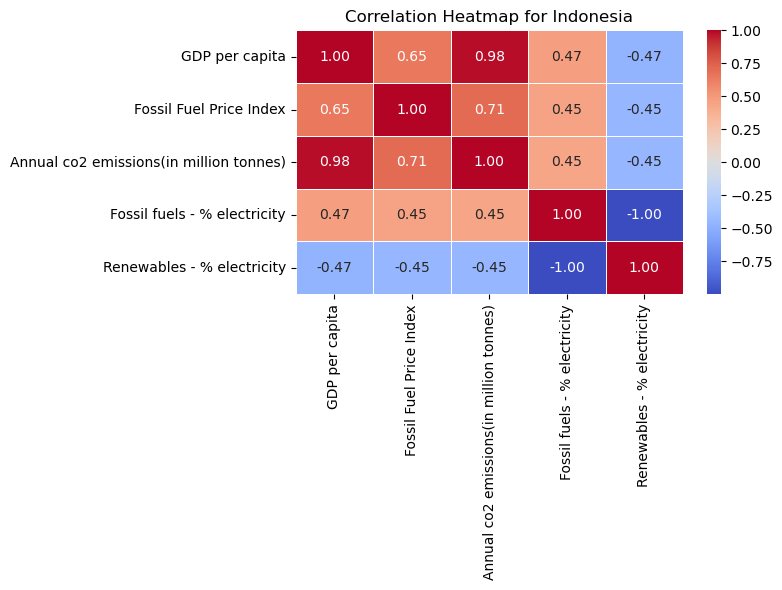

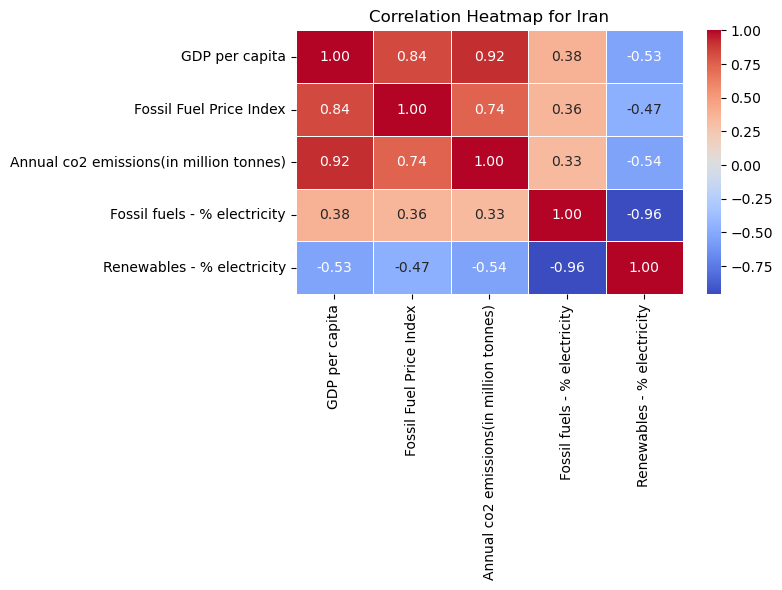

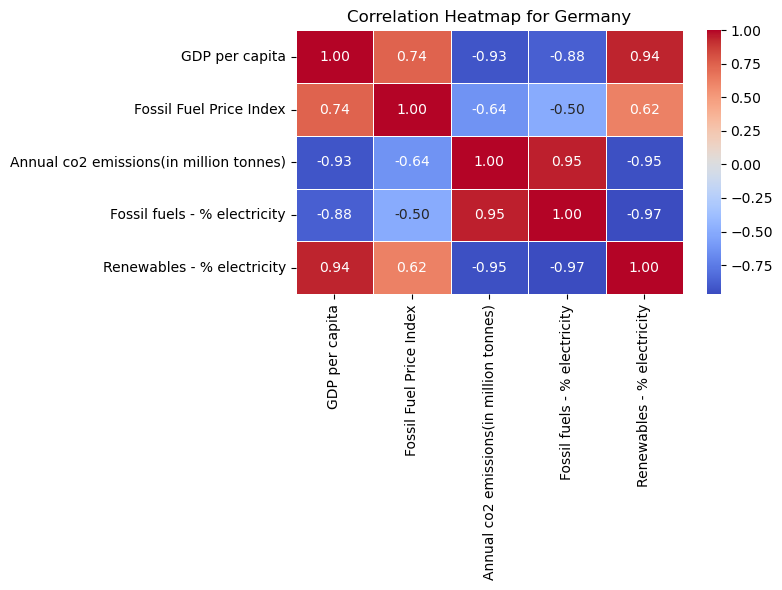

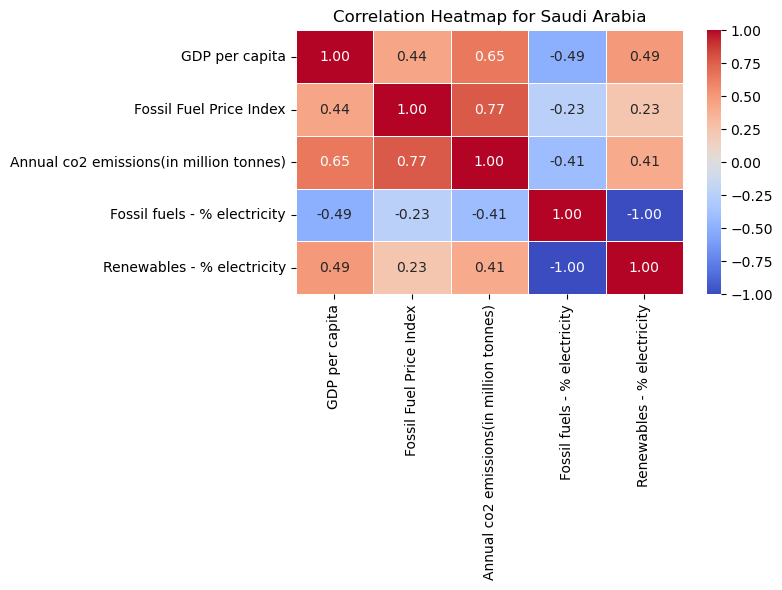

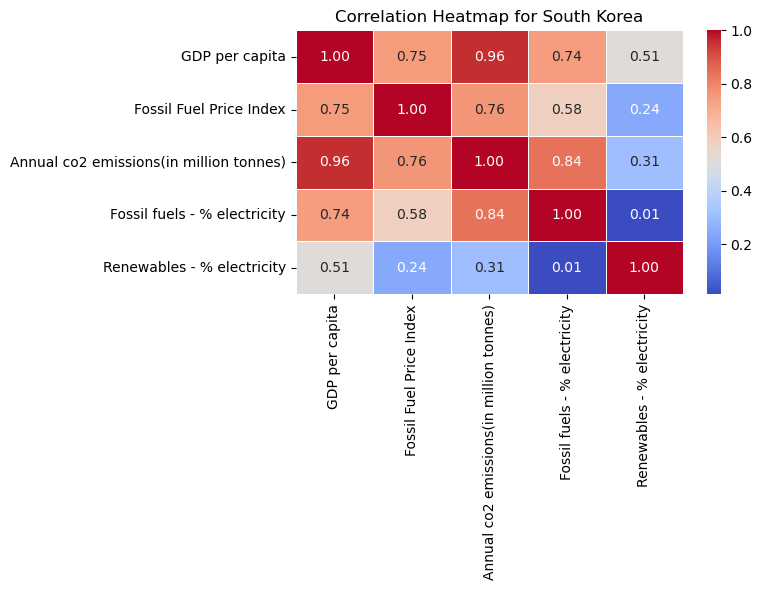

In [183]:
for country in target_countries:
    country_data = merged_data[merged_data['Entity'] == country]
    
    # create correlation matrix
    corr_matrix = country_data[['GDP per capita', 'Fossil Fuel Price Index','Annual co2 emissions(in million tonnes)', 'Fossil fuels - % electricity', 'Renewables - % electricity']].corr()
    
    # plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
    plt.title(f"Correlation Heatmap for {country}")
    plt.tight_layout()
    plt.show()

<h2>Observations</h2>

While there are plenty observations to be made seeing the data visualized above, I will focus on the observations that directly link with the purpose of this report i.e. the relationship of renewable energy adoption with different factors that I am attempting to draw a connection between.

<h4>1. Renewable energy adoption and Fossil fuel prices</h4>

The relationship between fossil fuel prices and renewable energy adoption varies across countries. In Germany (0.62), United States (0.40), China (0.36) and Japan (0.33), rising fossil fuel prices are moderately positively correlated with renewable adoption, likely due to economic pressure and the availability of renewable energy infrastructure. Germany is particularly notable given it has the largest share of electricity generation from renewable sources amongst all countries.

Conversely, countries like Russia (-0.54), Indonesia (-0.45), and Iran (-0.47) show negative correlations, suggesting that fossil fuel price hikes may have less impact on renewable adoption. Their dependence on domestic fossil fuel resources or limited investment in renewables could explain this.

Finally, India (-0.05), Saudi Arabia (0.23) and South Korea (0.24) exhibit weak or no significant correlations, suggesting that fossil fuel prices do not strongly affect renewable energy adoption in these countries.

Overall, it can be concluded that fossil fuel price is not a very strong indicator of renewable energy adoption but could still have some effect in a limited capacity.

<h4>2. GDP and Renewable energy</h4>

The correlation between renewable energy share and GDP per capita shows a clear trend, especially in higher-GDP countries. Germany (0.94), United States (0.67), and Japan (0.69) exhibit strong positive correlations, indicating that wealthier nations with higher GDP per capita tend to invest more in renewable energy as part of their energy transition. This aligns with their stronger economic capacity to support renewable energy infrastructure.

China (0.85) stands out with a strong positive correlation, which reflects its government’s active push for renewable energy adoption despite its relatively lower GDP per capita compared to Western nations. Saudi Arabia (0.49) and South Korea (0.51) show moderate positive correlations, suggesting that while higher GDP helps facilitate renewable energy investment, it is not the sole driving factor.

In contrast, Russia (-0.55) and Iran (-0.53) show negative correlations, suggesting that despite their economic resources, these countries have not prioritized renewable energy adoption. This could be due to their reliance on fossil fuels and the lack of strong policies to transition to renewables.

Lastly, India (-0.02) and Indonesia (-0.47) display weak to negative correlations, possibly reflecting the challenges they face in prioritizing renewables due to economic constraints, high fossil fuel reliance, and limited renewable energy infrastructure. Both the countries have maintained a certain level of fossil fuel usage throughout the last 30 years.

Given these correlations, it can be concluded that countries with higher GDP per capita generally tend to have better renewable energy shares. Wealthier nations have the economic capacity to invest in and transition to cleaner energy sources, while lower-GDP countries may face challenges in prioritizing renewable energy adoption due to economic constraints and existing fossil fuel dependence.

<h4>3. CO2 Emissions and Energy Transition</h4>

The correlation coefficients between CO2 emissions and renewable energy share show varied results across countries. China (0.74) and South Korea (0.31) have moderate to weak positive correlations, suggesting that while these countries experience high CO2 emissions, their transitions to renewables are still in progress. In contrast, the United States (-0.75), Japan (-0.85), and Germany (-0.95) show strong negative correlations, reflecting their successful reduction in CO2 emissions while adopting renewable energy. These three countries lead in renewable energy adoption, outpacing other nations, except China. India’s correlation is close to zero, indicating no significant relationship between CO2 emissions and renewable energy adoption. 

Graphs depicting annual CO2 emissions further support this, with the U.S., Japan, and Germany showing impressive reductions over time. South Korea is also making progress, though at a slower pace. Meanwhile, China continues to increase its CO2 emissions, dampening the positive effects of renewable transitions. The overall trend suggests that CO2 emissions may not be sufficient to explain renewable energy adoption across countries. While some nations like China, and South Korea show a positive correlation between CO2 emissions and renewable energy share, this could indicate that high emissions alone do not necessarily drive faster adoption of renewables. In contrast, countries like the United States, Japan, and Germany, with strong negative correlations, highlight that renewable adoption can lead to significant reductions in emissions. 

-----

<h1>Hypotheses</h1>

Based on the observations, I propose the following hypotheses;

<i>Hypothesis 1: Fossil fuel price fluctuations influence the adoption rates of renewable energy across countries.</i>  
  
<i>Hypothesis 2: Countries with higher GDP per capita are more likely to adopt higher shares of renewable energy for electricity generation.</i>  

<i>Hypothesis 3: Countries with decreasing CO₂ emissions exhibit a higher share of renewable energy in electricity generation.</i>
 
The overarching research question here is: 
<b>To what extent do market, economic, and environmental factors influence the adoption of clean energy technologies across countries?</b>

-----

<h1>Validate or invalidate the hypotheses with statistical analysis</h1>

### <u>Hypothesis 1  - Fossil fuel prices and renewable energy adoption</u>

<i>Hypothesis 1: Fossil fuel price fluctuations influence the adoption rates of renewable energy across countries.</i> 

Default statement: Fossil fuel prices do not affect adoption of renewable energy.

Null hypothesis: The mean renewable energy adoption rate is the same, regardless of whether fossil fuel prices are high or low.

$H_0: μ_{highprices} = μ_{lowprices}$

Alternative hypothesis: The adoption rate of renewable energy is higher when fossil fuel prices are high.

$H_A: μ_{highprices} ≠ μ_{lowprices}$ 

Testing strategy: Two-sample t-test comparing renewable energy adoption means between periods of high and low fossil fuel prices. Use a threshold (e.g., median price) to split high vs. low.

In [307]:
# code for testing hypothesis 1

# splitting data into high and low fossil fuel price periods using the median price
median_price = merged_data['Fossil Fuel Price Index'].median()

# defining high and low price periods
high_price_period = merged_data[merged_data['Fossil Fuel Price Index'] > median_price]
low_price_period = merged_data[merged_data['Fossil Fuel Price Index'] <= median_price]

# extracting renewable energy adoption rates for both periods
high_price_adoption = high_price_period['Renewables - % electricity']
low_price_adoption = low_price_period['Renewables - % electricity']

# perform two-sample t-test
t_stat, p_value = stats.ttest_ind(high_price_adoption, low_price_adoption)

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis fails. There is a significant effect of fossil fuel prices on renewable energy adoption.\n")
else:
    print("The null hypothesis holds. Fossil fuel prices do not significantly affect renewable energy adoption.")

print(f"T-statistic: {t_stat}\n")
print(f"P-value: {p_value}")

The null hypothesis fails. There is a significant effect of fossil fuel prices on renewable energy adoption.

T-statistic: 2.3216574434064343

P-value: 0.020845388657127376


The null hypothesis is rejected and the t-statistic tells me that the difference between the means of renewable energy adoption between high and low fossil fuel price periods have a measurable impact on renewable energy share. Since the t-statistic is positive, it means that the relationship is positive i.e. as fossil fuel prices increase, the share of renewable energy also increases. There are a few lapses in this argument, despite having shown a relationship, causation is not guaranteed. I will attempt, however, to explain why I believe there is a relationship between these features.

Foremost come the economic incentives - as one commodity gets expensive, it is natural to seek alternative commodities. The International Energy Agency (IEA, 2004) has documented that energy prices and policy decisions are key factors in driving renewable energy adoption. For instance, as fossil fuel prices rise, the competitiveness of renewables improves, leading to greater investment in clean energy technologies.

On the other hand ther is an added layer of energy security when countries invest in different sources of energy. Having a  diverse mix of energy sources, including renewables, helps countries reduce dependence on fossil fuels and improve energy security. When fossil fuel prices rise, countries may experience supply instability, prompting them to invest in renewable energy to ensure a stable and sustainable energy supply. The rise in fossil fuel prices often triggers a strategic shift towards energy diversification, which includes investing in renewable sources. The International Renewable Energy Agency (IRENA) highlights that countries pursuing energy security are increasingly turning to renewables as a more reliable, domestic source of power (Gielen et,al. 2019)

Tthe statistical significance of this result highlights the importance and the effect of market functions on adoption of renewable energy.

----

### <u>Hypothesis 2 - GDP and renewable energy adoption</u>

<i>Hypothesis 2: Countries with higher GDP per capita are more likely to adopt renewable energy for electricity generation.</i>

Default statement: GDP does not affect energy mix.

Null hypothesis: The mean adoption of renewable energy are the same for high-GDP and low-GDP countries.

$H_0: μ_{high GDP} = μ_{low GDP}$

Alternative hypothesis: The mean adoption rates of renewable and nuclear energy are higher for high-GDP countries.

$H_A: μ_{high GDP} > μ_{low GDP}$

In [305]:
# code for testing hypothesis 2

mean_gdp_per_country = merged_data.groupby('Entity')['GDP per capita'].mean()

# classify countries as high or low GDP/capita
def classify_gdp(row):
    mean_gdp = mean_gdp_per_country[row['Entity']]
    return 'High GDP' if row['GDP per capita'] > mean_gdp else 'Low GDP'

merged_data['GDP Category'] = merged_data.apply(classify_gdp, axis = 1)
   
# split data into high GDP and low GDP categories
high_gdp_adoption = merged_data[merged_data['GDP Category'] == 'High GDP']['Renewables - % electricity']
low_gdp_adoption = merged_data[merged_data['GDP Category'] == 'Low GDP']['Renewables - % electricity']

# perform the t-test
t_stat, p_value = stats.ttest_ind(high_gdp_adoption, low_gdp_adoption)

if p_value < 0.05:
    print("The null hypothesis fails. High-GDP countries have significantly higher renewable energy adoption.")
else:
    print("The null hypothesis holds. No significant difference in renewable energy adoption between high and low GDP countries.")

print("t-statistic:", t_stat)
print("p-value:", p_value)

The null hypothesis fails. High-GDP countries have significantly higher renewable energy adoption.
t-statistic: 2.2054162997883564
p-value: 0.028097624400331842


The null hypothesis is rejected, indicating that high-GDP countries have significantly higher renewable energy adoption compared to low-GDP countries. The t-statistic of 2.21 and p-value of 0.028 suggest that the difference between the two groups is statistically significant at the 5% level. This finding is consistent with the general understanding that economic prosperity enables countries to invest in renewable energy infrastructure and technologies, which is crucial for achieving energy transition goals.

Several studies support the link between GDP and renewable energy adoption. According to the International Renewable Energy Agency (IRENA), wealthier countries often have greater financial resources to invest in renewable technologies, allowing them to diversify their energy mix and reduce dependence on fossil fuels which is  a very logically sound claim. 

Furthermore, study by the International Energy Agency (IEA) found that high-income countries tend to have stronger institutional frameworks and access to advanced technologies, which accelerates the adoption of renewable energy solutions (IEA, 2004). This is in line with the idea that economic prosperity not only provides the means for investment but also creates a favorable environment for innovation and policy development that supports the renewable energy transition.

Thus, the statistical significance of this result highlights the importance of economic factors, particularly GDP, in driving renewable energy adoption across countries.

---

### <u>Hypothesis 3 - CO₂ emissions and renewable energy adoption</u>

<i>Hypothesis 3:  Countries with decreasing CO₂ emissions exhibit a higher share of renewable energy in electricity generation.</i>

Default statement: CO₂ emission trends do not influence the share of renewable energy in electricity generation.

Null hypothesis: There is no significant difference in the renewable energy share of electricity generation between countries with decreasing CO₂ emissions and those with increasing emissions.

$H_0: μ_{decreasing} = μ_{increasing}$

Alternative hypothesis: Countries with decreasing CO₂ emissions have a higher mean renewable energy share in electricity generation than those with increasing emissions.

$H_A: μ_{decreasing} > μ_{increasing}$

In [309]:
# code for testing hypothesis 3
# splitting the data based on the visualizations in CO_2 trends by country

increasing_co2_countries = ['China', 'India', 'Indonesia', 'Iran', 'South Korea']
decreasing_co2_coutnries = ['United States', 'Germany', 'Russia', 'Japan']

# filter the data for the two groups   
increasing_co2_data = merged_data[merged_data['Entity'].isin(increasing_co2_countries)]['Renewables - % electricity']
decreasing_co2_data = merged_data[merged_data['Entity'].isin(decreasing_co2_coutnries)]['Renewables - % electricity']

# clculate the means for each group
mean_increasing = increasing_co2_data.mean()
mean_decreasing = decreasing_co2_data.mean()

# perform the t-test
t_stat, p_value = stats.ttest_ind(decreasing_co2_data, increasing_co2_data, alternative='greater')

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("The null hypothesis fails. Countries with decreasing CO2 emissions have significantly higher renewable energy adoption.")
else:
    print("The null hypothesis holds. No significant difference in renewable energy adoption between countries with decreasing and increasing CO2 emissions.")


t-statistic: 2.2742330635246497
p-value: 0.011824349987351932
The null hypothesis fails. Countries with decreasing CO2 emissions have significantly higher renewable energy adoption.


The null hypothesis is rejected once again, indicating that countries with decreasing CO2 emissions have significantly higher renewable energy adoption. With a t-statistic of 2.27 and a p-value of 0.012, the difference between countries with decreasing CO2 emissions and those without is statistically significant. This suggests that countries focused on reducing their carbon emissions are more likely to adopt renewable energy sources, creating a cycle of positive reinforcement.

According to the International Energy Agency (IEA), countries with stronger environmental policies, aimed at reducing CO2 emissions, are more inclined to implement clean energy strategies, including the integration of renewables (IEA, 2009). For example, countries like Germany have seen significant reductions in carbon emissions, are also leaders in renewable energy adoption, driven by ambitious climate policies and investments in clean technologies.

Research by the World Bank indicates that reducing CO2 emissions often requires countries to transition to cleaner energy sources. As CO2 emissions decrease, countries typically invest more heavily in renewables as part of their efforts. This relationship suggests that the drive to lower carbon emissions is a valid motivator for countries to shift from fossil fuels to renewable energy. 

However, similar to the other "proven" hypotheses, while this statistical finding is significant, it is important to recognize that the transition to renewable energy involves a combination of factors, including technological advancements, policy frameworks, and financial investment in addition to the environmental motivation of reducing CO2 emissions.

-----

<h2>Extend with machine learning predictions</h2>

The task is to accurately classify a country in the right renewable energy class based on different economic, market and environmental factors. In other words, with the knwoledge gained through data exploration and hypothesis testing - I will now attempt to apply this knowledge to practical modeling. This would allow me 1) judge how well these factors perform when it comes to classification and 2) understand what factors show a more promising path of accurate prediction. By doing this, I can understand how variables such as GDP per capita, fossil fuel prices and CO2 emissions influence renewable energy adoption. 

#### Research Questions (RQs):

- RQ1: How do CO2 trends (increasing or decreasing) relate to the renewable energy share in countries? 
  
- RQ2: How do GDP and fossil fuel prices affect renewable energy adoption in countries? 

- RQ3: How does GDP and CO2 emissions affect renewable energy adoption in countries?

                    

### <i>RQ1: How well do CO2 trends (increasing and decreasing) predict renewable energy share in countries?</i>

Testing strategy: The data will be clustered based on carbon emission trends (increasing or decreasing) and compared with the share of renewable energy. This approach will help assess whether CO2 emission trends have predictive potential for renewable energy adoption.

In [312]:
# k-means for RQ1

# split the data into train and test
train_data, test_data = train_test_split(merged_data, test_size = 0.2, random_state = 42)

# preprocessing for both train and test
train_data['CO2_diff'] = train_data.groupby('Entity')['Annual co2 emissions(in million tonnes)'].diff()
train_data['CO2 Trend'] = train_data['CO2_diff'].apply(lambda x: 'Increasing' if x > 0 else ('Decreasing' if x < 0 else 'N/a'))
train_data['CO2 Trend Numeric'] = train_data['CO2 Trend'].map({'Increasing': 1, 'Decreasing': 0, 'N/a': -1})

test_data['CO2_diff'] = test_data.groupby('Entity')['Annual co2 emissions(in million tonnes)'].diff()
test_data['CO2 Trend'] = test_data['CO2_diff'].apply(lambda x: 'Increasing' if x > 0 else ('Decreasing' if x < 0 else 'N/a'))
test_data['CO2 Trend Numeric'] = test_data['CO2 Trend'].map({'Increasing': 1, 'Decreasing': 0, 'N/a': -1})

# K-means clustering on the training data
kmeans = KMeans(n_clusters = 2, random_state = 50)
train_data['Cluster'] = kmeans.fit_predict(train_data[['Renewables - % electricity', 'CO2 Trend Numeric']])

# predict the clusters for the test data
test_data['Cluster'] = kmeans.predict(test_data[['Renewables - % electricity', 'CO2 Trend Numeric']])

# evaluation: silhouette score on test data
test_silhouette_score = silhouette_score(test_data[['Renewables - % electricity', 'CO2 Trend Numeric']], test_data['Cluster'])
print(f"Test Silhouette Score: {test_silhouette_score}")

Test Silhouette Score: 0.581917345232447


### Result RQ 1

The model performed moderately well, achieving a Silhouette Score of 0.58. This suggests that while CO2 emission trends can often predict renewable energy adoption rates, there are instances where the predictions may not be as accurate. Nonetheless, the results indicate that there is a discernible relationship between CO2 emissions and renewable energy adoption, implying that CO2 trends can serve as a relevant factor in predicting renewable energy share to a limited but notable extent.

The answer to the RQ1 is, CO2 trends (increasing and decreasing) may not be sufficient along to predict renewable energy share to a higher degree.

### <i>RQ2: How well do GDP and fossil fuel prices predict renewable energy levels (i.e. high or low) in countries? </i>

In [314]:
# Gaussian NB classifier code for RQ2
data_rq2 = merged_data[['Entity', 'Renewables - % electricity', 'GDP per capita', 'Fossil Fuel Price Index']]
data_rq2 = data_rq2.dropna(subset =['Renewables - % electricity', 'GDP per capita', 'Fossil Fuel Price Index'])

# use median value of Renewables - % electricity to use as the threshold and sorting
threshold = data_rq2['Renewables - % electricity'].median()
data_rq2['High Renewables'] = (data_rq2['Renewables - % electricity'] > threshold).astype(int)

X = data_rq2[['GDP per capita', 'Fossil Fuel Price Index']]
y = data_rq2['High Renewables']


# split the data, reserving 30:70 for testing:training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# train the mode
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# make predictions on the test set!
y_pred = nb_model.predict(X_test)

# evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.797979797979798
Precision: 0.7678571428571429
Recall: 0.86
F1 Score: 0.8113207547169812


### Result

This model performed the best overall, demonstrating consistently high performance across evaluation metrics, which strengthens my confidence in the relationship between GDP per capita, Fossil Fuel Price Index and High or Low Renewable share of electricity generation. The accuracy of 0.79 indicates that the model correctly predicted the outcomes 79% of the time, reflecting its general reliability. A precision of 0.76 suggests that when the model predicted a positive outcome, it was correct 76% of the time, highlighting a good balance between true positives and false positives. The recall of 0.86 indicates that the model was successful in identifying 86% of all actual positive instances, demonstrating its effectiveness in detecting relevant cases. Finally, an F1 score of 0.81 shows that the model strikes a strong balance between precision and recall, making it a well-rounded and reliable model for this task. It is very possible that since this is the only model with more than one predictive parameters, it could have affected the prediction accuracy in a positive way.

The answer to the RQ2 is, GDP per capita and Fossil fuel prices are good indicators of renewable energy shares and these variables are capable of explaining variance in renewable energy shares better than other analyses in this report.

### <i> RQ3: How well do GDP per capita and CO2 emissions affect renewable energy adoption in countries? </i>

In [302]:
# Gaussian NB classifier code for RQ3

data_rq3 = merged_data[['Entity', 'Renewables - % electricity', 'GDP per capita', 'Annual co2 emissions(in million tonnes)']]
data_rq3 = data_rq3.dropna(subset =['Renewables - % electricity', 'GDP per capita'])

threshold = data_rq3['Renewables - % electricity'].median()
data_rq3['High Renewables'] = (data_rq3['Renewables - % electricity'] > threshold).astype(int)

X = data_rq3[['GDP per capita', 'Annual co2 emissions(in million tonnes)']]
y = data_rq3['High Renewables']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# make predictions
y_pred = nb_model.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6868686868686869
Precision: 0.65
Recall: 0.7959183673469388
F1 Score: 0.7155963302752294


### Result

This model performed with an above-moderate level of success. Yielding an accuracy of 0.69, meaning it correctly predicted outcomes approximately 69% of the time. The precision of 0.65 shows that when the model predicted a positive outcome, it was correct 65% of the time, indicating room for improvement in minimizing false positives. The recall of 0.80 indicates that the model was able to correctly identify 80% of all actual positive instances, demonstrating a strong capability in detecting relevant cases. The F1 score of 0.72 reflects a decent balance between precision and recall, suggesting that the model is relatively effective in making predictions but could benefit from further fine-tuning to enhance its overall performance.

To answer the RQ3, I believe this model has potential to become better perhaps with more exposure to data. For the data set I worked with, it didn't seem to excel but it is still a good model with a decent balance.

----

## Final concludion and potential pitfalls

This project encapsulates a comprehensive and insightful journey into renewable energy adoption, delving into the interplay between economic, market, and environmental factors. The analysis undertaken in this project sheds light on the statistical significance of various interesting relationships between the variables. 

One of the pivotal findings of this study is the relationship between high-GDP countries and significantly higher renewable energy adoption, signifying the profound impact of economic prosperity on the transition towards sustainable energy sources. This observation not only highlights the influence of economic factors on renewable energy adoption but also allows one to have a potential conversation on how advanced technologies and institutional frameworks to accelerate the adoption of renewable energy solutions in high-income countries. 

This insight aligns with the broader discourse on the role of economic prosperity in fostering an environment conducive to innovation and policy development, thereby strengthening the case for the pivotal role of economic factors such as GDP per capita in driving renewable energy adoption across nations. That being said, it is important to highlight the GDP per capita may not be a very apt representation of true wealth of a country, there are many more aspects to economic prosperity. Despite this, it proved to be a valuable variable in this report.

Furthermore, the analysis unearthed the relationship between CO2 emission trends and the share of renewable energy in electricity generation. The revelation that countries with decreasing CO2 emissions exhibit a higher share of renewable energy brought the intricate link between environmental sustainability and the adoption of renewable energy sources to light. This finding not only indicates the potential for environmental motivations to drive the transition towards renewable energy but also highlights the imperative of addressing CO2 emissions as a critical factor in shaping the energy landscape.

The report also was able to cover predictive analysis by the application of machine learning predictions to classify countries based on economic, market, and environmental factors. Here again, the relationship between GDP per capita, Fossil fuel index and renewable shares was in the limelight with the model performing notably well. The insights from this report can find use in many a fields, for instance, policy making and frameworks, sustainabile energy ladnscape and perhaps investment strategies.  

### Bibliography

- Ben-Salha, O., Hakimi, A., Zaghdoudi, T., Soltani, H. and Nsaibi, M. (2022). Assessing the Impact of Fossil Fuel Prices on Renewable Energy in China Using the Novel Dynamic ARDL Simulations Approach. Sustainability, [online] 14(16), p.10439. doi:https://doi.org/10.3390/su141610439.

- Burclaff, N. (n.d.). Research Guides: Oil and Gas Industry: A Research Guide: Oil and Gas Pricing. [online] guides.loc.gov. Available at: https://guides.loc.gov/oil-and-gas-industry/pricing.

- Ember (2024). Energy Data Explorer. [online] Our World in Data. Available at: https://ourworldindata.org/explorers/energy?hideControls=false&Total+or+Breakdown=Select+a+source&Energy+or+Electricity=Electricity+only&Metric=Annual+generation&Select+a+source=Oil&country=USA~GBR~CHN~OWID_WRL~IND~BRA~ZAF [Accessed 18 Jan. 2025].

- Gielen, D., Boshell, F., Saygin, D., Bazilian, M.D., Wagner, N. and Gorini, R. (2019). The Role of Renewable Energy in the Global Energy Transformation. Energy Strategy Reviews, [online] 24(24), pp.38–50. doi:https://doi.org/10.1016/j.esr.2019.01.006.

- IEA (2004). Renewable energy: market and policy trends in IEA countries.

- IEA (2009). IEA World Energy Outlook 2008 changes tack. Renewable Energy Focus, 9(7), p.17. doi:https://doi.org/10.1016/s1755-0084(09)70023-7.